# Polynomial Regression Demonstration

This notebook demonstrates how to use polynomial regression to predict the price of a house based on its lotsize.

## Import Required Libraries

Import the necessary libraries including matplotlib, numpy, pandas, and scikit-learn.

In [1]:
# Import the required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, r2_score

## Load Dataset

Load the Windsor housing dataset for polynomial regression analysis.

In [2]:
# Load the Stock Market Predictions dataset.
df = pd.read_csv("./data/simple_windsor.csv")
colors = ["#179E86", "#2580B7", "#9EBE5B", "#C03B26", "#44546A"]

# Extract the features and target variable.
X = df[["lotsize"]]
y = df["price"]

# Define polynomial degrees to plot.
degrees = [ 2, 3, 4, 5 ]

## Polynomial Regression Comparison

Compare polynomial regression models with different degrees and visualize the results.


Degree 2 - Mean Absolute Error: 16401.18412713578.
Degree 2 - R^2 Score: 0.3230252749747208.

Degree 3 - Mean Absolute Error: 16433.07203587501.
Degree 3 - R^2 Score: 0.3250491713255178.

Degree 4 - Mean Absolute Error: 16223.110372675432.
Degree 4 - R^2 Score: 0.3400001496820858.

Degree 5 - Mean Absolute Error: 16078.241431130158.
Degree 5 - R^2 Score: 0.3404122502710638.


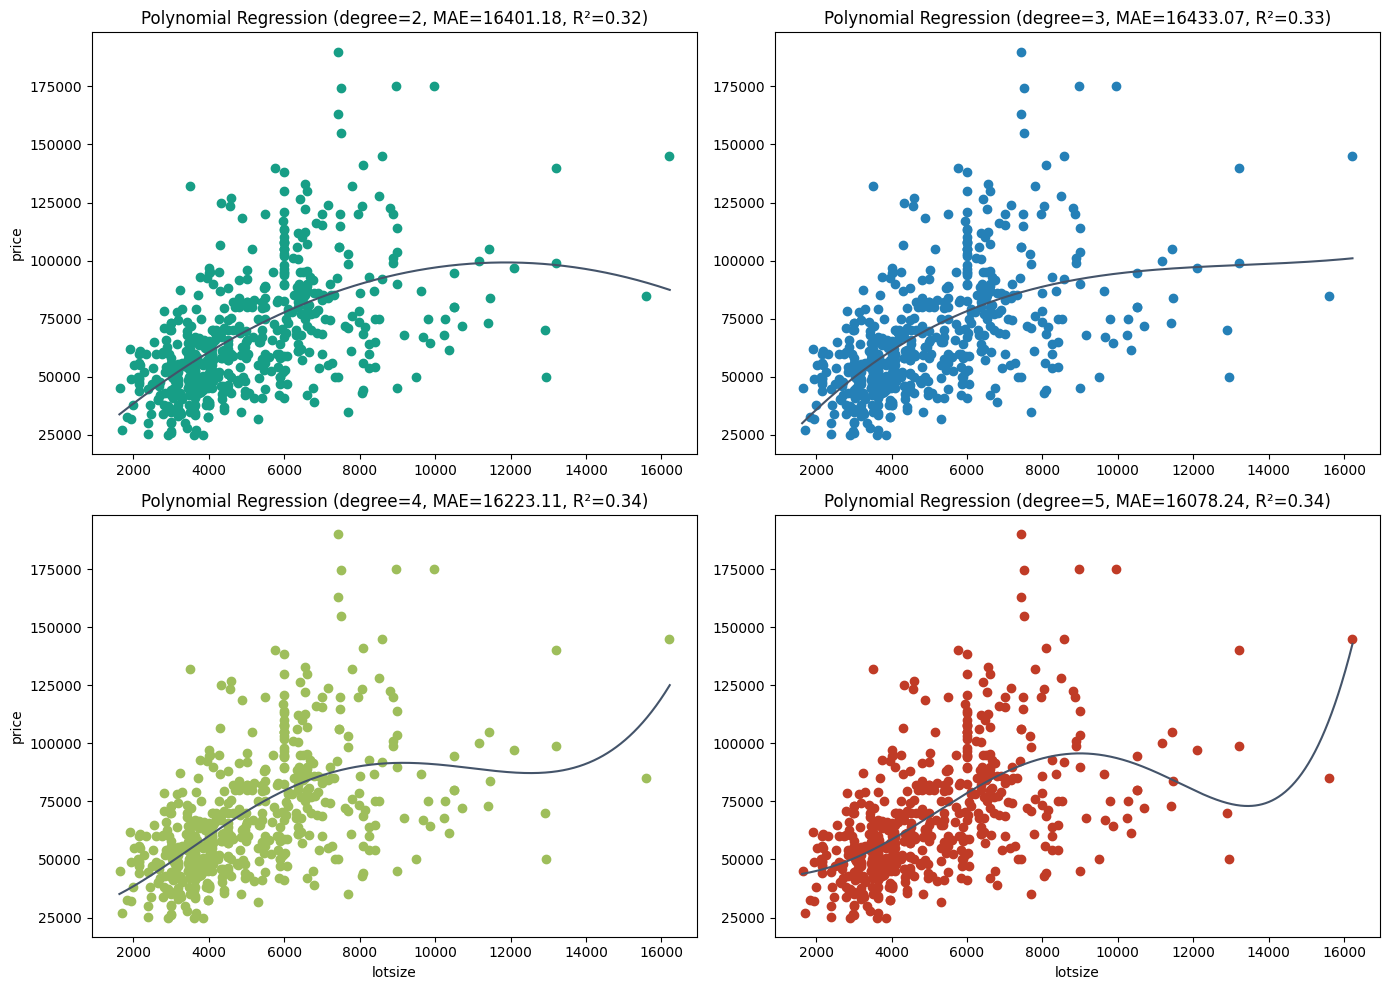

In [3]:
# Create a 2x2 plot.
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for i, degree in enumerate(degrees):

    # Create polynomial features.
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit the polynomial regression model.
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict using the polynomial model.
    y_pred = model.predict(X_poly)

    # Calculate and print metrics.
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"\nDegree {degree} - Mean Absolute Error: {mae}.")
    print(f"Degree {degree} - R^2 Score: {r2}.")

    # Predict using the polynomial model.
    X_test = np.linspace(X.min() - 20, X.max() + 20, 1000).reshape(-1, 1)
    X_test_poly = poly.transform(pd.DataFrame(X_test, columns=X.columns))
    y_test_pred = model.predict(X_test_poly)

    # Plot the polynomial regression results
    ax = axs[i // 2, i % 2]
    ax.scatter(X, y, color=colors[i])
    ax.plot(X_test, y_test_pred, color=colors[-1])
    if i // 2 == 1:
        ax.set_xlabel("lotsize")
    if i % 2 == 0:
        ax.set_ylabel("price")
    ax.set_title(
        f"Polynomial Regression (degree={degree}, MAE={mae:.2f}, R²={r2:.2f})")

plt.tight_layout()
plt.show()